In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
df.shape

(81, 4)

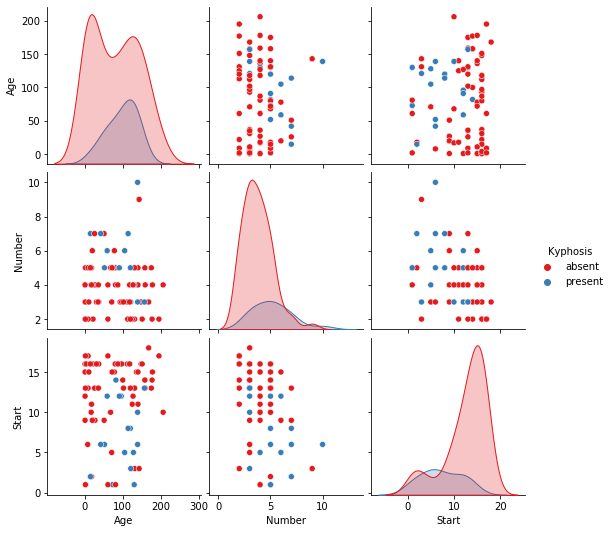

In [4]:
sns.pairplot(df, hue='Kyphosis', palette='Set1')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis', axis=1)

In [7]:
y = df['Kyphosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=101)

### Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt = DecisionTreeClassifier()

In [11]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
predictions = dt.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
print(confusion_matrix(y_test, predictions))

[[12  0]
 [ 0  5]]


In [15]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        12
     present       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



### Pattern to Display Graphic Trees

In [15]:
from IPython.display import Image  
 
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [18]:
%pip install pydot

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Purushotham\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [18]:
from six import StringIO

In [19]:
data = StringIO()
export_graphviz(dt, out_file=data, feature_names=features, filled=True, rounded=True)

In [20]:
graph = pydot.graph_from_dot_data(data.getvalue())

In [21]:
graph

In [22]:
from IPython.display import Image

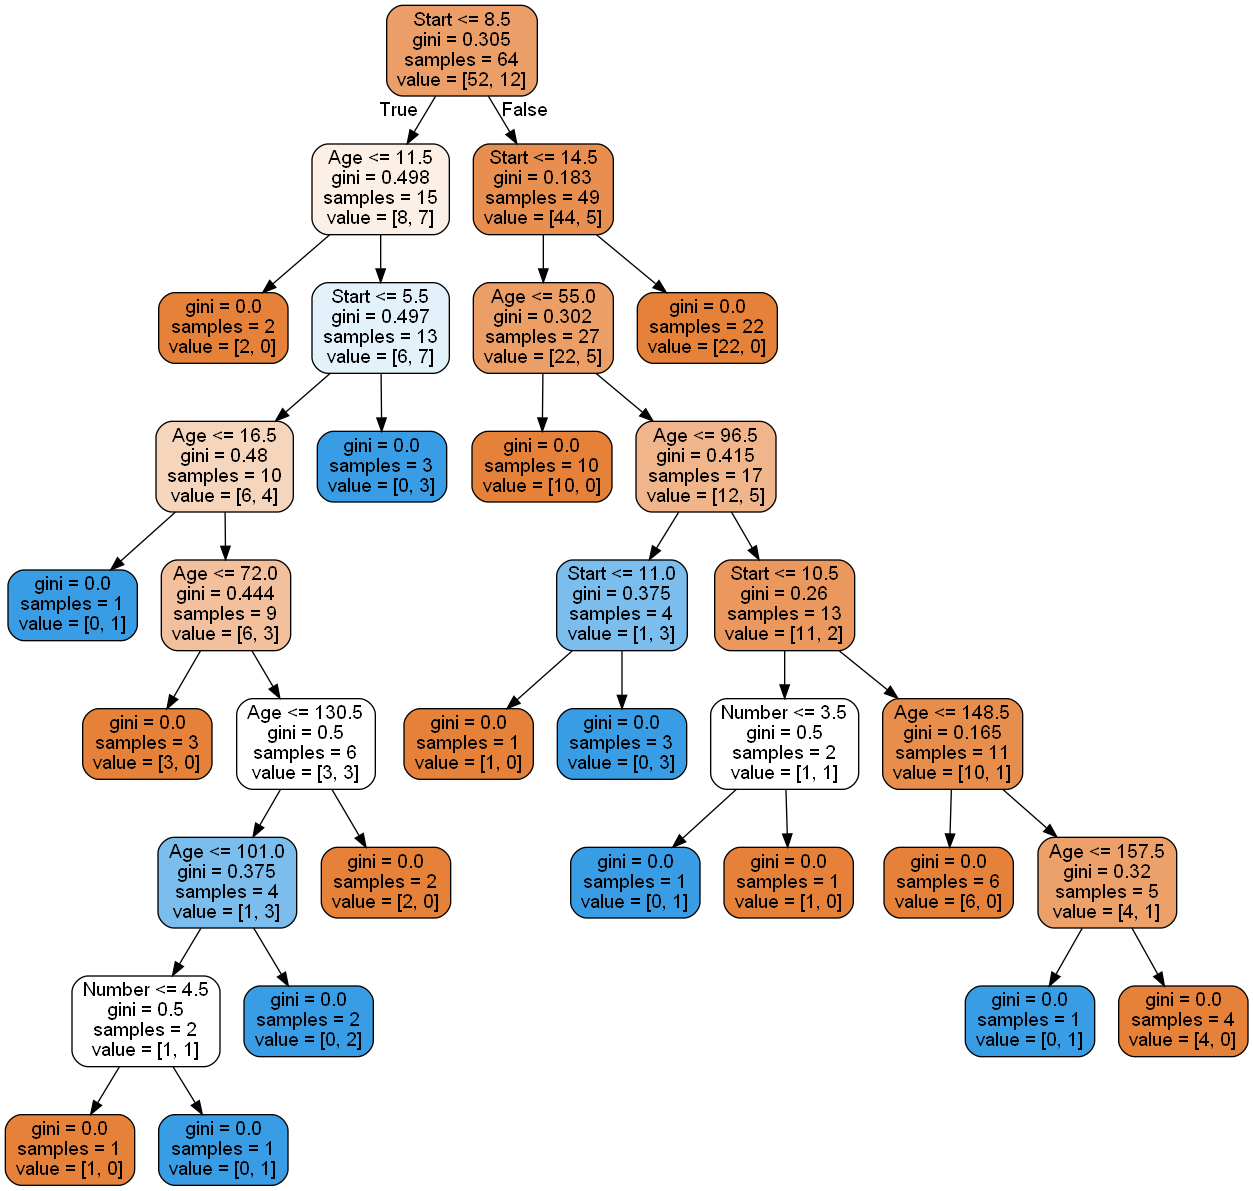

In [25]:
Image(graph[0].create_png())

### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1)

In [32]:
rfc_predictions = rfc.predict(X_test)

In [33]:
print(confusion_matrix(y_test, rfc_predictions))

[[12  0]
 [ 2  3]]


In [34]:
print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

      absent       0.86      1.00      0.92        12
     present       1.00      0.60      0.75         5

    accuracy                           0.88        17
   macro avg       0.93      0.80      0.84        17
weighted avg       0.90      0.88      0.87        17



In [35]:
pctdiff = np.sum(predictions == rfc_predictions)/len(predictions)

In [36]:
pctdiff

0.8823529411764706